# Local Outlier Factor (LOF)

__Local Outlier Factor (LOF)__ is an unsupervised algorithm for outlier detection, it is a powerful algorithm designed for anomaly detection, particularly effective in datasets with complex distributions or varying densities, such as financial datasets. By computing the local density deviation of each data point with respect to its neighbors, LOF can effectively identify outliers based on their deviation from the local density of surrounding points. This approach allows LOF to detect anomalies in regions with irregular shapes or varying densities, making it robust to noise and capable of uncovering subtle and previously unseen fraud patterns. LOF operates by comparing the local density of each point to that of its neighbors, enabling it to pinpoint regions of abnormal density and identify points with significantly lower densities as potential anomalies.

As with IF, using LOF as a semi-supervised model allows us to leverage the benefits of both unsupervised and supervised learning paradigms, leading to more accurate anomaly detection and better utilization of available data and domain knowledge.

## Table of Content

- Import Libraries
- Import Functions
- Load Data
- Base Model
  - Evaluation
  - Anomaly Analysis
- Tuned Model
  - Evaluation
  - Anomaly Analysis

## Evaluation Metrics

- For __Confusion Matrix__:
  - __TN (True Negatives)__ are the correctly predicted normal observations.
  - __TP (True Positives)__ are the correctly predicted anomaly observations.
  - __FN (False Negatives)__ are the anomalies that were incorrectly predicted as normal.
  - __FP (False Positives)__ are the normal observations that were incorrectly predicted as anomalies.

  We want the FN value to be as low as possible:
  - __Minimizing False Negatives (FN)__: In many scenarios, particularly in fraud detection, minimizing false negatives is crucial because the consequences of failing to detect an actual fraud or threat can be severe. Here, ensuring that real anomalies are not missed (reducing FN) takes precedence over avoiding false alarms (FP).
<br><br><br>
- For __Classification Report__:
  - __Class -1__ represents the anomalies or fraudulent transactions.
  - __Class 1__ represents the normal transactions.
  - The __metrics__ of Precision, Recall, F1-Score are shown for each class.
  - __Support__ is the true instances amout.
  - __Accuracy__ for the model: Accuracy is not a good metric to use for evaluating imbalanced datasets because it can be misleading. Accuracy measures the proportion of total correct predictions (both positive and negative) to all predictions. In an imbalanced dataset, a model can achieve a high accuracy simply by predicting the majority class in all instances.
  - __Macro Average__: The macro average calculates the metric independently for each class and then takes the average, treating all classes equally. In other words, it computes the metric within each class, sums the metric for each class, and then divides by the number of classes. This approach gives equal weight to each class, so it doesn't take into account class imbalance.
  - __Weighted Average__: The weighted average calculates the metric for each class independently but when it averages them, it gives a higher weight to the class with more instances. It computes the metric for each class, but when it averages them, it uses the support of each class (the number of instances of each class in the actual dataset) as weights. This approach is useful for our class imbalance, as it gives more importance to the class with more instances.

  We want to look at the metrics for each class and the weighted average.
<br><br><br>
- For __Metrics__:
  - __Recall (Sensitivity)__: Recall is the ratio of correctly predicted positive observations (true positives) to all actual positive observations (true positives + false negatives). It measures the proportion of actual anomalies that are correctly identified as such.
  - __Precision__: Precision is the ratio of correctly predicted positive observations (true positives) to the total predicted positives (true positives + false positives). It measures the proportion of predicted anomalies that are actually anomalies.
  - __F1 Score__: The F1 Score is the harmonic mean of Precision and Recall. It tries to find the balance between precision and recall. An F1 Score of 1 indicates perfect precision and recall, while an F1 Score of 0 indicates that either the precision or the recall is zero.
  - __PR AUC (Precision-Recall Area Under Curve)__: PR AUC represents the area under the precision-recall curve, which plots precision against recall for different threshold values. A larger area under the curve means that the classifier is performing better.
  - __AUROC (Area Under the Receiver Operating Characteristic curve)__: AUROC represents the likelihood of the model distinguishing observations from two classes. In other words, if you randomly select one observation from each class, the probability that the model will be able to "rank" them correctly. A model whose predictions are 100% wrong has an AUROC of 0, while one whose predictions are 100% correct has an AUROC of 1.
  - __Specificity__: Specificity (also called the true negative rate) measures the proportion of actual negatives (normal) that are correctly identified as such. It is calculated as the number of true negatives divided by the sum of true negatives and false positives. It complements recall by adding a measure for the rate of false alarms.

  Our main focus is on high Recall (predicting correctly the anomalies) and high AUROC (high distinction between classes).
<br><br><br>
- For __Anomaly Analysis__: 
  - Shows the distribution of values for each feature among the anomalies detected by the model.

# Import Libraries

In [1]:
from sklearn.neighbors import LocalOutlierFactor
import sys, os

# Import Functions

In [2]:
sys.path.insert(0, '../../')
from src.functions import Data, Modeling, Evaluation

dt = Data()
mod = Modeling()
eval = Evaluation()

# Load Data

In [3]:
# Get data directory
data_dir = os.path.join(os.getcwd(), '../../data/processed')

# Load processed data
X_train, X_val, X_test, y_train, y_val, y_test, unlabeled_test = dt.load_data(data_dir)

In [4]:
# Save column names
X_val_df = X_val

# Convert pandas dataframes to numpy arrays for memory efficiency
X_train = X_train.values
X_val = X_val.values
y_train = y_train.values
y_val = y_val.values

# Base Model

In [5]:
# Initialize the model
bm = LocalOutlierFactor(n_neighbors=20, contamination=0.1, novelty=True)
bm.fit(X_train)
bm_pred = bm.predict(X_val)

## Evaluation

### Confusion Matrix

In [6]:
bm_cm = eval.get_cm(bm_pred, y_val)
eval.cm_inf(bm_cm, 'Base Model - Local Outlier Factor')

Confusion Matrix for model Base Model - Local Outlier Factor:

True Positives: 658
True Negatives: 102640
False Positives: 11335
False Negatives: 3475




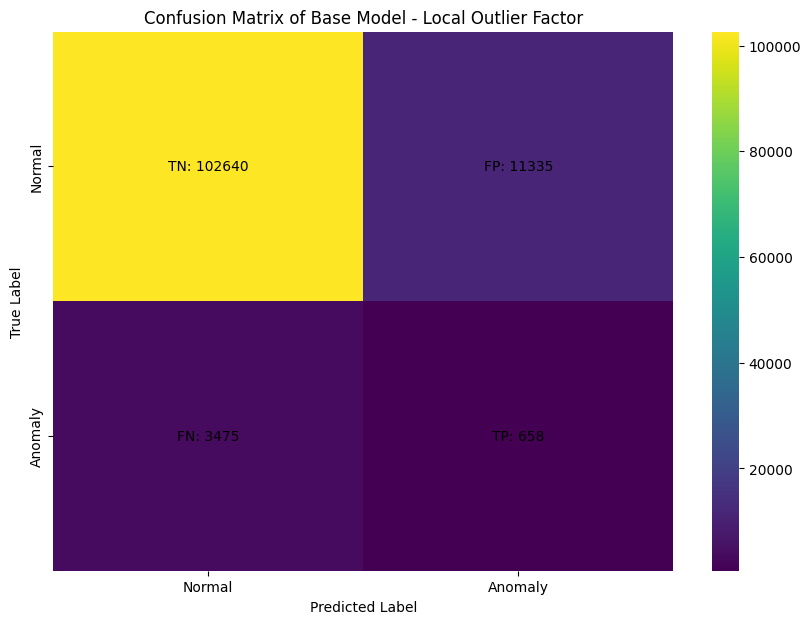

In [7]:
eval.plot_cm(bm_cm, 'Base Model - Local Outlier Factor')

### Classification Report

Class -1 represents the anomalies or fraudulent transactions

Class 1 represents the normal transactions

In [8]:
# Print the classification report
eval.print_classreport(y_val, bm_pred, 'Base Model - Local Outlier Factor')

Classification Report for Base Model - Local Outlier Factor:

              precision    recall  f1-score   support

          -1       0.05      0.16      0.08      4133
           1       0.97      0.90      0.93    113975

    accuracy                           0.87    118108
   macro avg       0.51      0.53      0.51    118108
weighted avg       0.94      0.87      0.90    118108





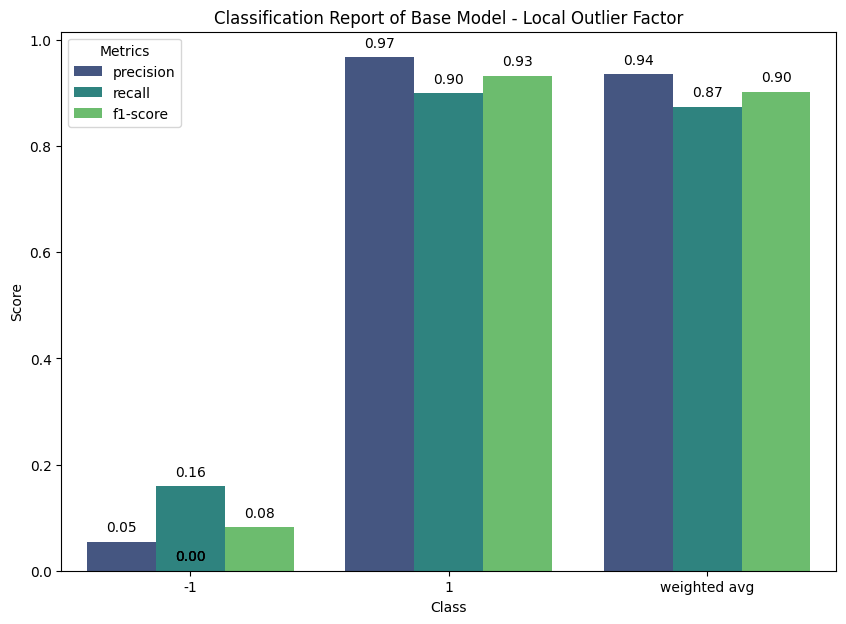

In [9]:
eval.plot_classreport(y_val, bm_pred, 'Base Model - Local Outlier Factor')

### Metrics

In [10]:
bm_metrics = eval.get_metrics(bm_cm, y_val, bm_pred)
eval.print_metrics(bm_metrics, 'Base Model - Local Outlier Factor')

Metrics of Base Model - Local Outlier Factor:

Recall: 0.1592
Precision: 0.0549
F1 Score: 0.0816
PR AUC: 0.0382
AU ROC: 0.5299
Specificity: 0.9005




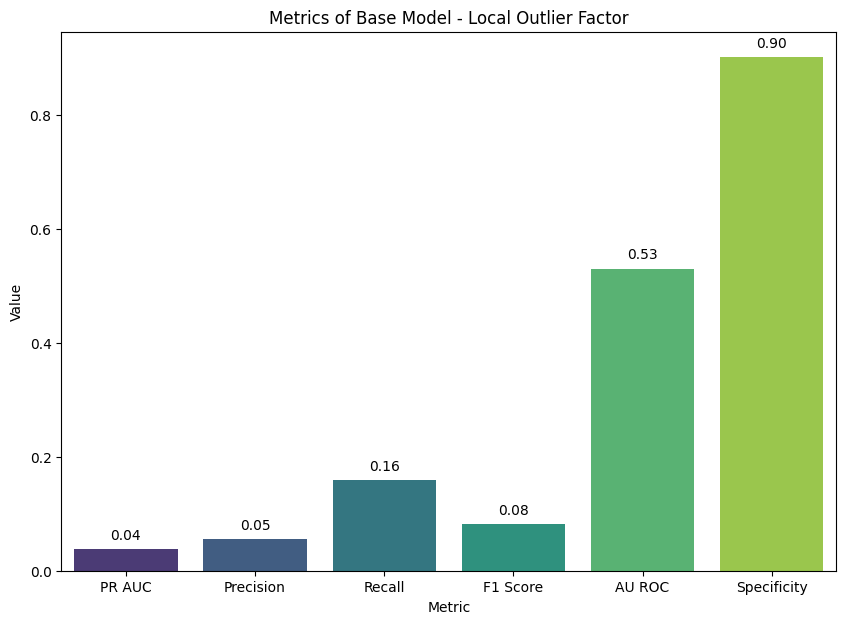

In [11]:
eval.plot_metrics(bm_metrics, 'Base Model - Local Outlier Factor')

## Anomaly Analysis

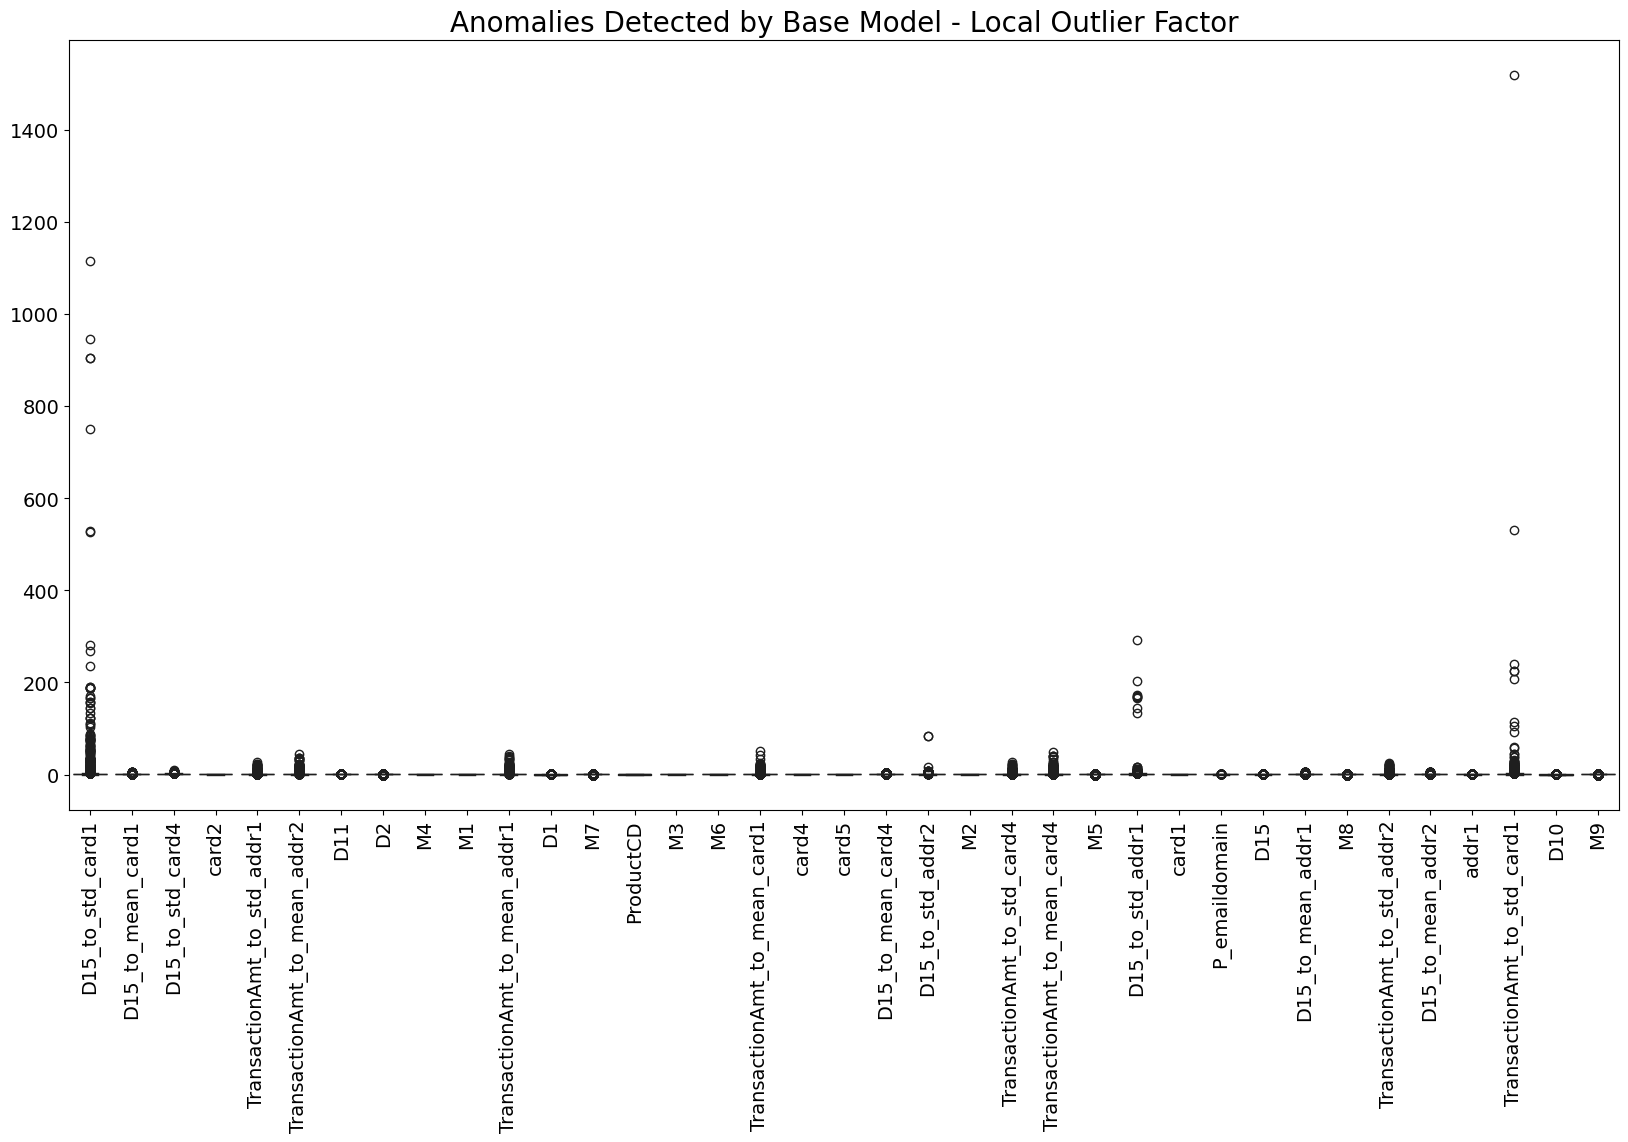

In [12]:
# Get the anomalies
bm_anomalies = X_val_df[bm_pred == -1]

# Boxplot of the anomalies
eval.plot_anomalies(bm_anomalies, 'Base Model - Local Outlier Factor')

# Tuned Model - GridSearch on Hyperparameters

In [13]:
# Define the parameter grid
tm_param_grid = {
    'n_neighbors': [15, 20, 25, 30],
    'algorithm': ['auto'],
    'contamination': [0.05, 0.1]
}

# Fine tune the model
tm_best_params, tm_best_estimator, metrics = mod.lof_hypertune(tm_param_grid, X_train, y_train)

# Use the best estimator to make predictions
tm_pred = tm_best_estimator.predict(X_val)

Best parameters: {'algorithm': 'auto', 'contamination': 0.05, 'n_neighbors': 30}
Best recall: 0.9516799070821003


## Evaluation

### Confusion Matrix

In [14]:
tm_cm = eval.get_cm(tm_pred, y_val)
eval.cm_inf(tm_cm, 'Tuned Model - Local Outlier Factor')

Confusion Matrix for model Tuned Model - Local Outlier Factor:

True Positives: 402
True Negatives: 108504
False Positives: 5471
False Negatives: 3731




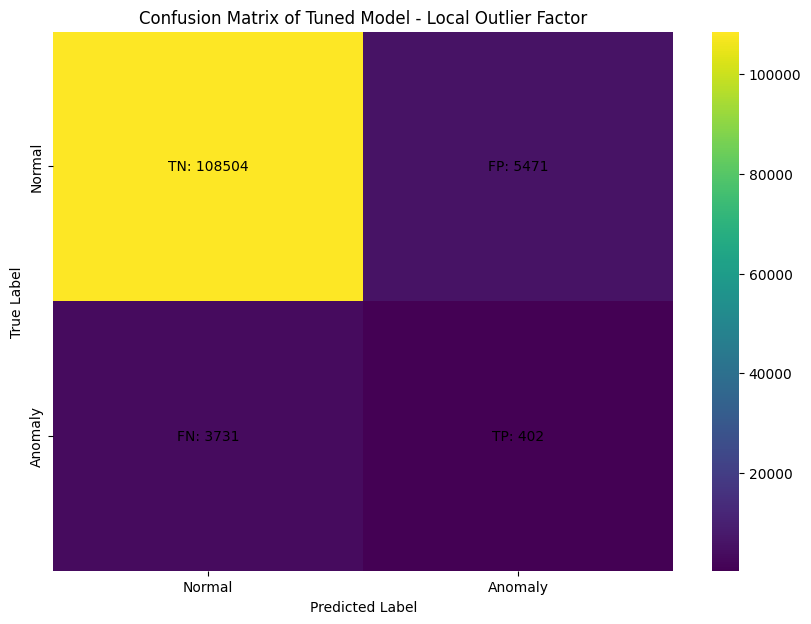

In [15]:
eval.plot_cm(tm_cm, 'Tuned Model - Local Outlier Factor')

### Classification Report

Class -1 represents the anomalies or fraudulent transactions

Class 1 represents the normal transactions

In [16]:
# Print the classification report
eval.print_classreport(y_val, tm_pred, 'Tuned Model - Local Outlier Factor')

Classification Report for Tuned Model - Local Outlier Factor:

              precision    recall  f1-score   support

          -1       0.07      0.10      0.08      4133
           1       0.97      0.95      0.96    113975

    accuracy                           0.92    118108
   macro avg       0.52      0.52      0.52    118108
weighted avg       0.94      0.92      0.93    118108





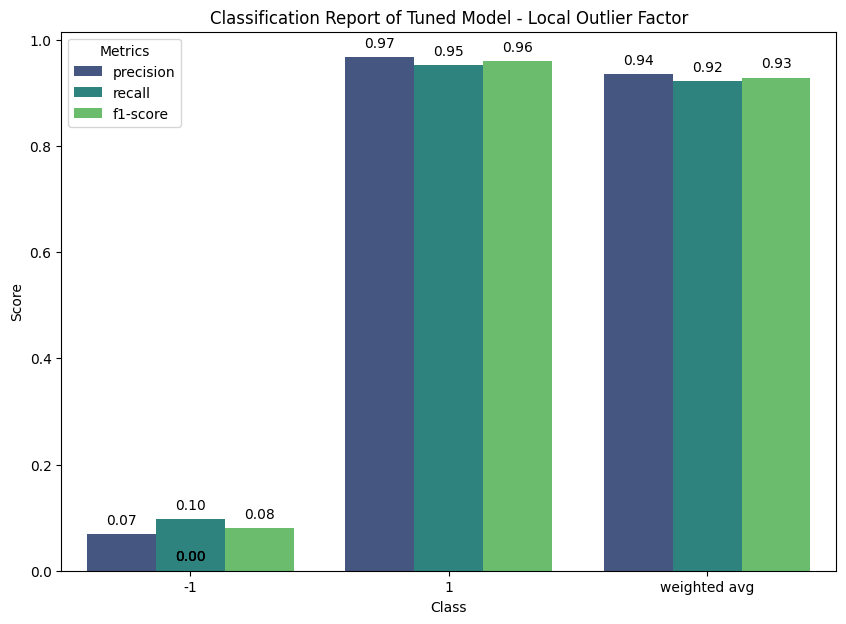

In [17]:
eval.plot_classreport(y_val, tm_pred, 'Tuned Model - Local Outlier Factor')

### Metrics

In [18]:
tm_metrics = eval.get_metrics(tm_cm, y_val, tm_pred)
eval.print_metrics(tm_metrics, 'Tuned Model - Local Outlier Factor')

Metrics of Tuned Model - Local Outlier Factor:

Recall: 0.0973
Precision: 0.0684
F1 Score: 0.0804
PR AUC: 0.0382
AU ROC: 0.5246
Specificity: 0.952




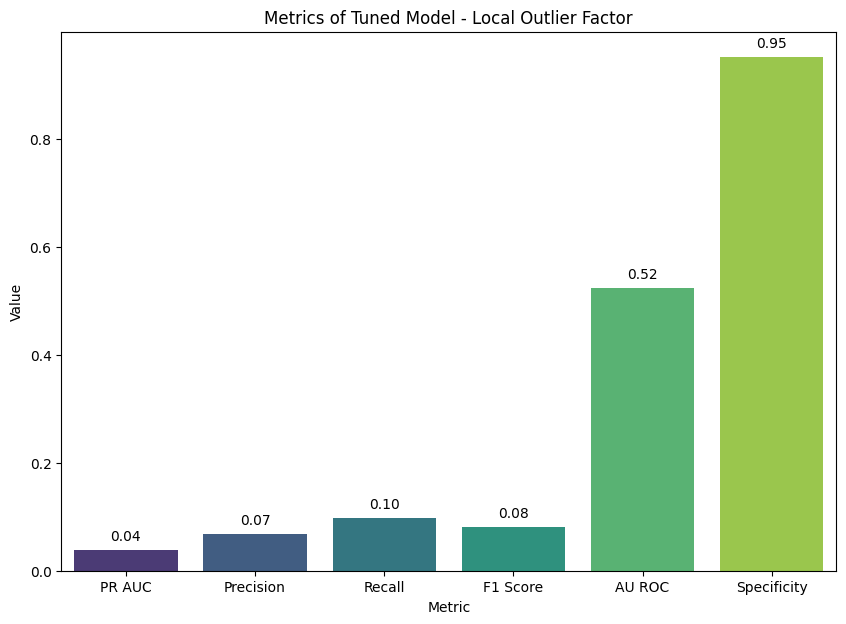

In [19]:
eval.plot_metrics(tm_metrics, 'Tuned Model - Local Outlier Factor')

## Anomaly Analysis

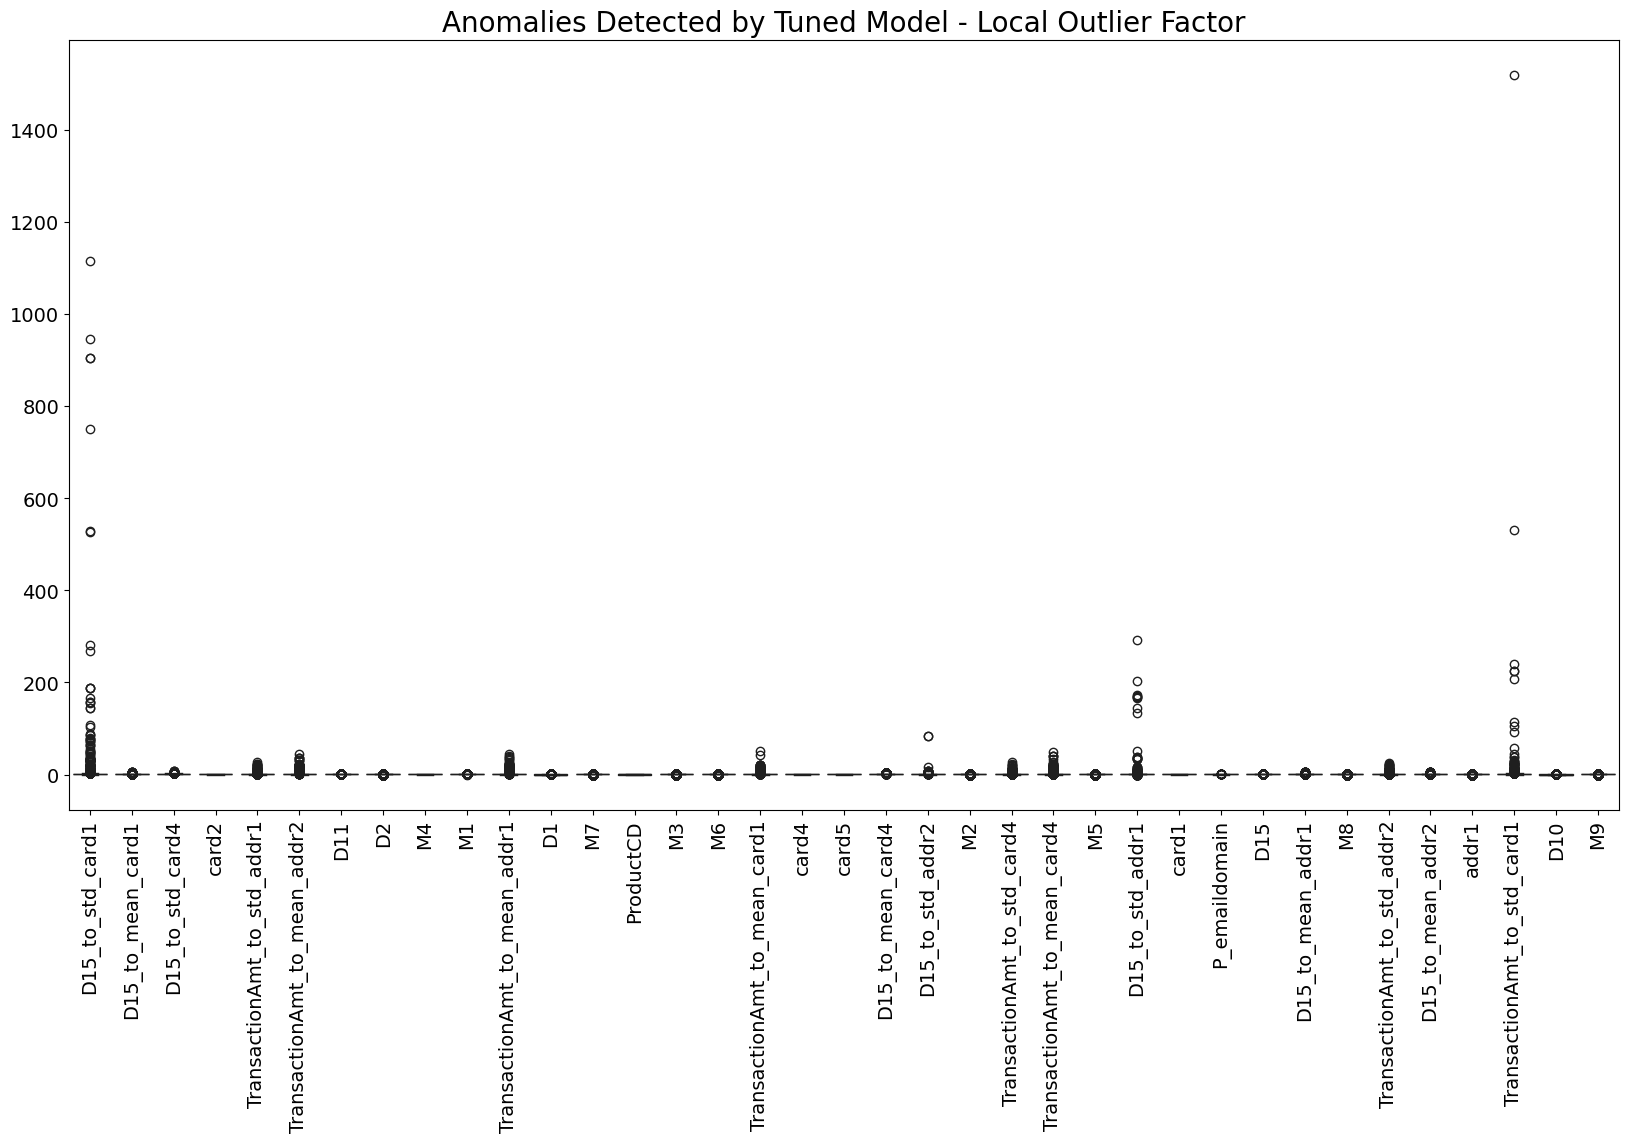

In [20]:
# Get the anomalies
tm_anomalies = X_val_df[tm_pred == -1]

# Boxplot of the anomalies
eval.plot_anomalies(tm_anomalies, 'Tuned Model - Local Outlier Factor')